# Linear Regression

## Performance measure

### Regression metrics

#### Mean Absolute Error  
- 잔차의 절대값의 sum

In [1]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

#### Root Mean Squared Error (RMSE)
- 잔차 제곱의 sum의 루트

In [2]:
from sklearn.metrics import mean_squared_error  #mse만 제공
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

#### R squared  
- 0과 1사이 숫자로 크면 클수록 높은 적합도를 지님

In [3]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

### Hold-out Method

#### Holdout Method(Sampling)  
- 데이터를 Training과 Test와 나눠서 모델을 생성하고 테스트하는 기법  
- 가장 일반적인 모델 생성을 위한 데이터 랜덤 샘플링 기법  
- Training과 Test를 나누는 비율은 데이터의 크기에 따라 다름  
- 일반적으로 Training Data 2/3, Test Data 1/3를 활용함

#### Training & Test data set  
- Training한 데이터로 다시 Test를 할 경우, Training 데이터에 과도하게 fitting 된 모델을 사용할 수 있음  
- 새로운 데이터가 출현했을 때, 기존 모델과의 차이 존재  
- 모델은 새로운 데이터가 처리가능하도록 generalize되야함  
- 이를 위해 Training Set과 Test Set을 분리함

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear Regression w/sklearn

### Boston House Price Dataset

In [5]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [6]:
boston = load_boston()  
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size,1)

In [10]:
y_data.shape

(506, 1)

In [11]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data)
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

In [14]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(fit_intercept=True, 
                                     normalize=False, 
                                     copy_X=True, 
                                     n_jobs=8)   #cpu개수
regr.fit(X_train, y_train)
regr

LinearRegression(n_jobs=8)

In [15]:
regr.coef_ , regr.intercept_

(array([[-2.34400849,  1.17591257, -0.23910576,  0.52526289, -1.66819944,
          3.08091791,  0.0326676 , -3.73609303,  1.68914188, -1.32689553,
         -1.71390787,  0.81613596, -4.29637563]]),
 array([29.76394088]))

In [16]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-2.34400849  1.17591257 -0.23910576  0.52526289 -1.66819944  3.08091791
   0.0326676  -3.73609303  1.68914188 -1.32689553 -1.71390787  0.81613596
  -4.29637563]]
intercept:  [29.76394088]


In [17]:
regr.predict(x_data[:5])

array([[-58.1942421 ],
       [-32.55294094],
       [-12.14775003],
       [ 16.69720789],
       [  8.92898518]])

In [18]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_

array([[-58.1942421 ],
       [-32.55294094],
       [-12.14775003],
       [ 16.69720789],
       [  8.92898518]])

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [20]:
y_true = y_test
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7286555046778032, 3.7240119579566215, 25.004475122684983)

In [21]:
y_true = y_train
y_hat = regr.predict(X_train)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7406635434087881, 3.1882791204920697, 20.905276523822618)

## Stochastic Gradient Descent

### Full-batch gradient descent  
- GD는 1개의 데이터를 기준으로 미분  
- 그러나 일반적으로 GD = (full) batch GD라고 가정  
- 모든 데이터 셋으로 학습  
- 업데이트 감소 > 계산상 효율적(속도) 가능  
- 안정적인 Cost 함수 수렴  
- 지역 최적화 가능  
- 메모리 문제  
- 대규모 dataset > 모델/파라미터 업데이트가 느려짐

### Stochastic gradient descent  
- 원래 의미는 dataset에서 random하게 training sample을 뽑은 후 학습할 때 사용함  
- Data를 넣기 전에 Shuffle

- 빈번한 업데이트 모델 성능 및 개선 속도 확인 가능  
- 일부 문제에 대해 더 빨리 수렴  
- 지역 최적화 회피  
- 대용량 데이터시 시간이 오래걸림  
- 더 이상 cost가 줄어들지 않는 시점의 발견이 어려움

### Mini-batch (stochastic) gradient descent  
- 한 번의 일정량의 데이터를 랜덤하게 뽑아서 학습  
- SGD와 Batch GD를 혼합한 기법  
- 가장 일반적으로 많이 쓰이는 기법

#### Epoch & Batch-size  
- 전체 데이터가 Training 데이터에 들어갈 때 카운팅  
- Full-batch를 n번 실행하면 n epoch  
- Batch-size 한번에 학습되는 데이터의 개수  
- 총 5120개의 Training data에 512 batch-size면 몇 번 학습을 해야 1epoch이 되는가? - **10번**

## SGD implementation issues

### Learning-rate decay  
- 일정한 주기로 Learning rate을 감소시키는 방법  
- 특정 epoch 마다 Learning rate를 감소  
- Hyper-parameter 설정의 어려움  
- 지수감소, 1/t감소

### 종료조건 설정  
- SGD과정에서 특정 값이하로 cost function이 줄어들지 않을 경우 GD를 멈추는 방법  
- 성능이 좋아지지 않는/필요없는 연산을 방지함  
- 종료조건을 설정 - tol > loss - previous_loss  
- tol은 hyperparameter로 사람 설정함

## Overfitting and Regularization

### Overfitting  
- 학습데이터 과다 최적화 > 새로운 데이터의 예측 감소

### Bias - Variance tradeoff  
- 학습데이터 과다 최적화 > 새로운 데이터의 예측 감소

#### High bias  
- 원래 모델에 많이 떨어짐, 잘못된 데이터만 계속 학습함  
- 잘못된 Weight만 Update  

#### High variance  
- 모든 데이터에 민감하게 학습, Error를 고려하지 않음  
- 모든 Weight가 Update

### Overcoming Overfitting  
- 더 많은 데이터를 활용한다  
- Feature의 개수를 줄인다  
- 적절히 Parameter를 선정한다  
- Regularization

## L2 - Regularization / Ridge

### L2 regularization  
- 기존 Cost function L2(norm) penalty term을 추가  
- norm: 벡터의 길이 혹은 크기를 측정하는 방법  
- L2: Euclidean distance, 원점에서 벡터 좌표까지의 거리

### L1 regularization  
- 기존 Cost function L1(norm) penalty term을 추가  
- norm: 벡터의 길이 혹은 크기를 측정하는 방법  
- L1: manhattan distance, 원점에서 벡터 좌표까지의 거리

## Sklearn_lr

### Linear Regression with Normal equation

In [22]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_boston
boston = load_boston()

In [24]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [25]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
X = df.values
y = boston.target

In [28]:
from sklearn.linear_model import  LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [30]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [31]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [32]:
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse

4.55236459846306

In [33]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.72402343733974

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

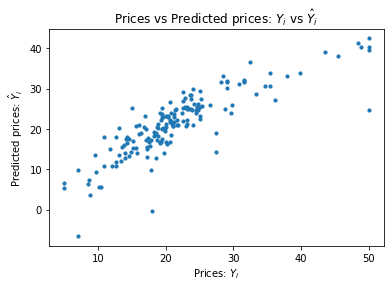

In [34]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [35]:
lr_ne.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

In [36]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Linear Regression with SGD

In [58]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [40]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [41]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [42]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(40651148704900.61, 1.6525158910279424e+27)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

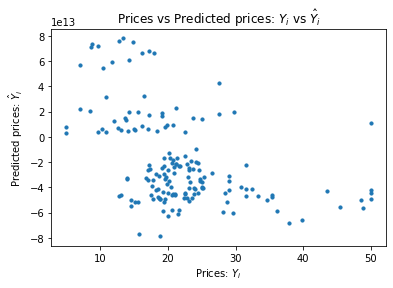

In [43]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [45]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [46]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [47]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.658510393888241, 21.701719089964776)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

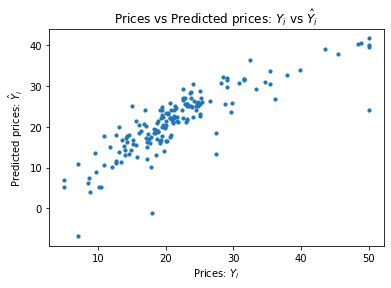

In [48]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### Linear Regression with Ridge & Lasso regression

In [49]:
from sklearn.linear_model import Lasso, Ridge

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [51]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [52]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.579058484791168, 20.967776607137985)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

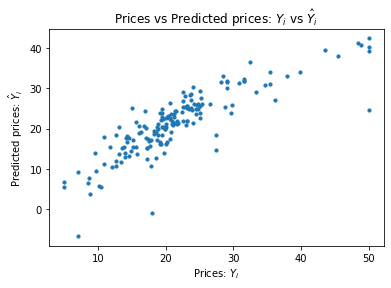

In [53]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [54]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train,y_train)
    p = ridge.predict(X_test)
    err = p-y_test
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.5529		 5.8757
0.418	 4.5749		 5.8419
0.826	 4.5935		 5.8270
1.234	 4.6074		 5.8186
1.642	 4.6180		 5.8126
2.050	 4.6262		 5.8078
2.458	 4.6327		 5.8034
2.866	 4.6379		 5.7993
3.274	 4.6422		 5.7953
3.682	 4.6458		 5.7912
4.090	 4.6489		 5.7873
4.498	 4.6515		 5.7833
4.906	 4.6538		 5.7793
5.313	 4.6558		 5.7753
5.721	 4.6576		 5.7714
6.129	 4.6593		 5.7674
6.537	 4.6607		 5.7635
6.945	 4.6621		 5.7596
7.353	 4.6633		 5.7557
7.761	 4.6644		 5.7518
8.169	 4.6655		 5.7479
8.577	 4.6665		 5.7441
8.985	 4.6674		 5.7404
9.393	 4.6683		 5.7366
9.801	 4.6691		 5.7329
10.209	 4.6699		 5.7292
10.617	 4.6707		 5.7256
11.025	 4.6714		 5.7220
11.433	 4.6722		 5.7184
11.841	 4.6729		 5.7149
12.249	 4.6735		 5.7114
12.657	 4.6742		 5.7079
13.065	 4.6748		 5.7045
13.473	 4.6755		 5.7011
13.881	 4.6761		 5.6978
14.289	 4.6767		 5.6945
14.697	 4.6773		 5.6912
15.104	 4.6779		 5.6880
15.512	 4.6785		 5.6848
15.920	 4.6791		 5.6816
16.328	 4.6797		 5

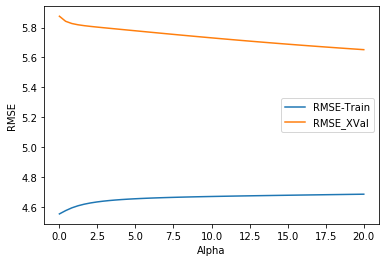

In [55]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_XVal')
plt.legend( ('RMSE-Train', 'RMSE_XVal') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

In [56]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: linear regression
RMSE on training: 4.5524
RMSE on 10-fold CV: 5.8770
Method: lasso
RMSE on training: 4.7242
RMSE on 10-fold CV: 5.7637
Method: ridge
RMSE on training: 4.5687
RMSE on 10-fold CV: 5.8487
